<a href="https://colab.research.google.com/github/2IS239-Data-Analytics/Code_along_1/blob/main/Analysing_Twitter_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import tweepy as tw
import pandas as pd


In [ ]:
consumer_key= s
consumer_secret= 
access_token= 
access_token_secret= 

In [ ]:
from tweepy import OAuthHandler
from tweepy import API

# Consumer key authentication(consumer_key,consumer_secret can be collected from our twitter developer profile)
auth = OAuthHandler(consumer_key, consumer_secret)

# Access key authentication(access_token,access_token_secret can be collected from our twitter developer profile)
auth.set_access_token(access_token, access_token_secret)

# Set up the API with the authentication handler
api = API(auth)

In [ ]:
# Define the search term and the date_since date as variables
search_words = "#översvämning"
#search_words = "#flooding"
date_since = "2021-08-01"

In [ ]:
# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="sv",
              #lang="en",
              since=date_since).items()
tweets


In [ ]:
for tweet in tweets:
    print(tweet.text)

RT @Sjobergbild: Översvämning i Bollnäs 1916. Ljusnan har stigit till en rekordhög nivå i maj med hela 6,4 meter över det normala och samhä…
RT @Sjobergbild: Översvämning i Bollnäs 1916. Ljusnan har stigit till en rekordhög nivå i maj med hela 6,4 meter över det normala och samhä…
RT @Sjobergbild: Översvämning i Bollnäs 1916. Ljusnan har stigit till en rekordhög nivå i maj med hela 6,4 meter över det normala och samhä…
RT @Sjobergbild: Översvämning i Bollnäs 1916. Ljusnan har stigit till en rekordhög nivå i maj med hela 6,4 meter över det normala och samhä…
RT @Sjobergbild: Översvämning i Bollnäs 1916. Ljusnan har stigit till en rekordhög nivå i maj med hela 6,4 meter över det normala och samhä…
RT @Sjobergbild: Översvämning i Bollnäs 1916. Ljusnan har stigit till en rekordhög nivå i maj med hela 6,4 meter över det normala och samhä…
RT @Sjobergbild: Översvämning i Bollnäs 1916. Ljusnan har stigit till en rekordhög nivå i maj med hela 6,4 meter över det normala och samhä…
Översvämning 

In [ ]:
#Ta bort re-tweets
new_search = search_words + " -filter:retweets"
new_search

'#översvämning -filter:retweets'

In [ ]:
# Collect tweets
tweets_no_retweet = tw.Cursor(api.search,
              q=new_search,
              lang="sv",
              #lang="en",
              since=date_since).items()
tweets_no_retweet


In [ ]:
# Iterate and print tweets
for tweet in tweets_no_retweet:
    print(tweet.text)
    

Översvämning i Bollnäs 1916. Ljusnan har stigit till en rekordhög nivå i maj med hela 6,4 meter över det normala oc… https://t.co/ylSF2jQUwi


Ladda tweets i en lista istället

In [ ]:
# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="sv",
              #lang="en",
              since=date_since).items(50)

# Save a list of tweets, only the text field.
tweet_list= [tweet.text for tweet in tweets]
#Skriv ut lista
tweet_list

['RT @Sjobergbild: Översvämning i Bollnäs 1916. Ljusnan har stigit till en rekordhög nivå i maj med hela 6,4 meter över det normala och samhä…',
 'RT @Sjobergbild: Översvämning i Bollnäs 1916. Ljusnan har stigit till en rekordhög nivå i maj med hela 6,4 meter över det normala och samhä…',
 'RT @Sjobergbild: Översvämning i Bollnäs 1916. Ljusnan har stigit till en rekordhög nivå i maj med hela 6,4 meter över det normala och samhä…',
 'RT @Sjobergbild: Översvämning i Bollnäs 1916. Ljusnan har stigit till en rekordhög nivå i maj med hela 6,4 meter över det normala och samhä…',
 'RT @Sjobergbild: Översvämning i Bollnäs 1916. Ljusnan har stigit till en rekordhög nivå i maj med hela 6,4 meter över det normala och samhä…',
 'RT @Sjobergbild: Översvämning i Bollnäs 1916. Ljusnan har stigit till en rekordhög nivå i maj med hela 6,4 meter över det normala och samhä…',
 'RT @Sjobergbild: Översvämning i Bollnäs 1916. Ljusnan har stigit till en rekordhög nivå i maj med hela 6,4 meter över det normal

In [ ]:
#Vem har twittrat?
tweets = tw.Cursor(api.search,
                       q=new_search,
                       lang="sv",
                       since=date_since).items(5)
                       
users_locs = [[tweet.user.screen_name, tweet.user.location] for tweet in tweets]
users_locs

[['Sjobergbild', 'Vilhelmina, Sverige']]

En tweet levereras från twitters API som ett JSON objekt. För att hämta ett antal tweets och spara texten och det datum de skapats från dem i en csv-fil kan följande kod användas. Det går också att spara direkt som en JSON-fil.

In [ ]:
import csv

# Open/Create a file to append data
csvFile = open('tweets_oversvamning.csv', 'a')
#Use csv Writer
csvWriter = csv.writer(csvFile)

for tweet in tw.Cursor(api.search,q=search_words,count=100,
                           lang="sv",
                           since=date_since).items(10):
    print (tweet.created_at, tweet.text)
    csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])

2021-08-31 20:21:42 RT @Sjobergbild: Översvämning i Bollnäs 1916. Ljusnan har stigit till en rekordhög nivå i maj med hela 6,4 meter över det normala och samhä…
2021-08-31 17:34:22 RT @Sjobergbild: Översvämning i Bollnäs 1916. Ljusnan har stigit till en rekordhög nivå i maj med hela 6,4 meter över det normala och samhä…
2021-08-31 13:26:24 RT @Sjobergbild: Översvämning i Bollnäs 1916. Ljusnan har stigit till en rekordhög nivå i maj med hela 6,4 meter över det normala och samhä…
2021-08-31 10:23:54 RT @Sjobergbild: Översvämning i Bollnäs 1916. Ljusnan har stigit till en rekordhög nivå i maj med hela 6,4 meter över det normala och samhä…
2021-08-31 08:01:33 RT @Sjobergbild: Översvämning i Bollnäs 1916. Ljusnan har stigit till en rekordhög nivå i maj med hela 6,4 meter över det normala och samhä…
2021-08-31 08:00:11 RT @Sjobergbild: Översvämning i Bollnäs 1916. Ljusnan har stigit till en rekordhög nivå i maj med hela 6,4 meter över det normala och samhä…
2021-08-31 07:41:58 RT @Sjobergbil

# Det finns mängder med interna metoder för ett enda Twitterobjekt i Tweepy. VI hämtar alla tweets från en specifik användare och tittar på vilken information vi kan extrahera från en tweet.

In [ ]:
# We create a tweet list as follows:
tweets_svt = api.user_timeline(screen_name="svtnyheter", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets_svt)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets_svt[:5]:
    print(tweet.text)
    print()


Number of tweets extracted: 200.

5 recent tweets:

Polisen har inlett en förundersökning om vårdslöshet i trafik, och anhöriga har underrättats.

https://t.co/WudpaeW9mh

Polisen tillkallade nationella bombgruppen som på plats kunde säkerställa att det handlade om en skarp handgranat.

https://t.co/PyJ6uyCoUu

De tre utvisade kvinnornas män uppges antingen vara döda eller försvunna.

https://t.co/dIfBvYV1Yf

De flesta av dem har levt hos IS över lång tid och flera av deras barn har fötts hos terrorsekten.

https://t.co/6kSRnNNu7V

ANALYS: "En klimatmyndighet, kanske med en egen ”statsklimatolog”, skulle kunna få samma befogenheter som Folkhälso… https://t.co/8PlqP0BjrQ



In [ ]:
# Internal methods of a single tweet object:
dir(tweets_svt[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_api',
 '_json',
 'author',
 'contributors',
 'coordinates',
 'created_at',
 'destroy',
 'entities',
 'favorite',
 'favorite_count',
 'favorited',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'parse',
 'parse_list',
 'place',
 'possibly_sensitive',
 'retweet',
 'retweet_count',
 'retweeted',
 'retweets',
 'source',
 'source_url',
 'text',
 'truncated',
 'user']

# Dags för nästa steg, data wrangling och deskriptiv statistik för att lära känna vår datamängd.

In [ ]:
import nltk as tm
from nltk.corpus import stopwords
import wordcloud
import matplotlib
from sklearn.feature_extraction.text import CountVectorizer
# Sätt upp visualiseringen
%matplotlib inline
matplotlib.pyplot.rcParams['figure.figsize'] = [10, 6]

In [ ]:
#lägg data i en dataframe

svt_tweets = pd.DataFrame(data=[tweet.text for tweet in tweets_svt], columns=['Tweets'])
svt_tweets



,Tweets
0,Polisen har inlett en förundersökning om vårds...
1,Polisen tillkallade nationella bombgruppen som...
2,De tre utvisade kvinnornas män uppges antingen...
3,De flesta av dem har levt hos IS över lång tid...
4,"ANALYS: ""En klimatmyndighet, kanske med en ege..."
...,...
195,Kina och Ryssland öppnar för vänskapliga relat...
196,Sharialagar ska gälla i Afghanistan och kvinno...
197,Utrikesminister Ann Linde (S) kommer att hålla...
198,"""Vi har sett vad som kan hända på andra platse..."


In [ ]:
#lite mer information om varje tweet som kan vara intressant
svt_tweets['len']  = [len(x.text) for x in tweets_svt]  # number of characters in a tweet (think length)
svt_tweets['ID']   = [x.id for x in tweets_svt]
svt_tweets['Source'] = [x.source for x in tweets_svt]
svt_tweets['Likes']  = [x.favorite_count for x in tweets_svt] # favorite_count
svt_tweets['RTs']    =  [x.retweet_count for x in tweets_svt]  # retweet count

svt_tweets

,Tweets,len,ID,Source,Likes,RTs
0,Polisen har inlett en förundersökning om vårds...,118,1434502071793844224,Twitter Web App,1,0
1,Polisen tillkallade nationella bombgruppen som...,139,1434485713538539521,Twitter Web App,5,4
2,De tre utvisade kvinnornas män uppges antingen...,98,1434470362276933634,Twitter Web App,14,9
3,De flesta av dem har levt hos IS över lång tid...,123,1434434266805440515,Twitter Web App,12,5
4,"ANALYS: ""En klimatmyndighet, kanske med en ege...",140,1434415978557972480,Twitter Web App,50,17
...,...,...,...,...,...,...
195,Kina och Ryssland öppnar för vänskapliga relat...,129,1427856426702102531,Twitter Web App,20,8
196,Sharialagar ska gälla i Afghanistan och kvinno...,140,1427714064743010314,Twitter Web App,30,8
197,Utrikesminister Ann Linde (S) kommer att hålla...,140,1427666913237389316,Twitter Web App,7,1
198,"""Vi har sett vad som kan hända på andra platse...",140,1427653232139063296,Twitter Web App,29,3


Lite mer funktioner för att bekanta oss med den textdata vi ska analysera..

In [ ]:
svt_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweets  200 non-null    object
 1   len     200 non-null    int64 
 2   ID      200 non-null    int64 
 3   Source  200 non-null    object
 4   Likes   200 non-null    int64 
 5   RTs     200 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 9.5+ KB


In [ ]:
svt_tweets.shape

(200, 6)

# Städning av textdata

In [ ]:
#Vi är ju faktiskt bara intresserade av fritexten i varje tweet, plocka ut denna kolumn
tweets_corpus = svt_tweets.Tweets
tweets_corpus

0      Polisen har inlett en förundersökning om vårds...
1      Polisen tillkallade nationella bombgruppen som...
2      De tre utvisade kvinnornas män uppges antingen...
3      De flesta av dem har levt hos IS över lång tid...
4      ANALYS: "En klimatmyndighet, kanske med en ege...
                             ...                        
195    Kina och Ryssland öppnar för vänskapliga relat...
196    Sharialagar ska gälla i Afghanistan och kvinno...
197    Utrikesminister Ann Linde (S) kommer att hålla...
198    "Vi har sett vad som kan hända på andra platse...
199    Talibanerna utropar ”allmän amnesti” och uppma...
Name: Tweets, Length: 200, dtype: object

In [ ]:
#Ta bort emojiis
encode2ascii = lambda x: x.encode('ascii', errors='ignore').decode('utf-8')
clean_tweets = tweets_corpus.apply(encode2ascii)
clean_tweets

0      Polisen har inlett en frunderskning om vrdslsh...
1      Polisen tillkallade nationella bombgruppen som...
2      De tre utvisade kvinnornas mn uppges antingen ...
3      De flesta av dem har levt hos IS ver lng tid o...
4      ANALYS: "En klimatmyndighet, kanske med en ege...
                             ...                        
195    Kina och Ryssland ppnar fr vnskapliga relation...
196    Sharialagar ska glla i Afghanistan och kvinnor...
197    Utrikesminister Ann Linde (S) kommer att hlla ...
198    "Vi har sett vad som kan hnda p andra platser ...
199    Talibanerna utropar allmn amnesti och uppmanar...
Name: Tweets, Length: 200, dtype: object

In [ ]:
clean_tweets = clean_tweets.str.replace(r'http\S+', '')
clean_tweets

0      Polisen har inlett en frunderskning om vrdslsh...
1      Polisen tillkallade nationella bombgruppen som...
2      De tre utvisade kvinnornas mn uppges antingen ...
3      De flesta av dem har levt hos IS ver lng tid o...
4      ANALYS: "En klimatmyndighet, kanske med en ege...
                             ...                        
195    Kina och Ryssland ppnar fr vnskapliga relation...
196    Sharialagar ska glla i Afghanistan och kvinnor...
197    Utrikesminister Ann Linde (S) kommer att hlla ...
198    "Vi har sett vad som kan hnda p andra platser ...
199    Talibanerna utropar allmn amnesti och uppmanar...
Name: Tweets, Length: 200, dtype: object

När vi städat klart behöver vi skapa en datamängd som vi kan analysera, hur det bör göras beror på vad vi vill analysera. I detta fall vill vi undersöka trender, eller ofta förekommande ämnen. För detta är en möjlighet att räkna ord (det gör man generellt "alltid" när man jobbar med NLP). 

Vad vi behöver då är en Term Document Matrix (TDM), också kallad Document Term Matrix (DTM). En TDM är en tabell som fångar antal ord i ett dokument. Exempelvis kan vi räkna ord i varje tweet och slagra detta i en rad i vår TDM. 

Vi kan dessutom förvänta oss att behöva utföra detta flera gånger, och därmed vill vi ha en funktion för detta. 

In [ ]:
tm.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopWords = set(stopwords.words('swedish'))
#stopWords

In [ ]:
#definiera en funktion som tar ett corpus med text och det antal som ett ord måste förkomma för att vara med i matrisen (en gång här)
def create_term_document_matrix(corpus, min_df=1):
    #Instansiera objektet med givna inparametrar
    cvec = CountVectorizer(min_df=min_df, stop_words=stopWords)
    #Skapa en matris för hela corpuset 
    tfmatrix = cvec.fit_transform(corpus)
    #Returnera den skapade matrisen som en DataFrame
    return pd.DataFrame(data=tfmatrix.toarray(), columns=cvec.get_feature_names())

In [ ]:
create_term_document_matrix(clean_tweets.head(5))

,analys,anhriga,antingen,barn,befogenheter,bombgruppen,dda,egen,flera,flesta,folkhlso,frsvunna,frunderskning,ftts,handgranat,handlade,hos,inlett,is,kanske,klimatmyndighet,kunna,kvinnornas,levt,lng,mn,nationella,plats,polisen,skarp,skerstlla,statsklimatolog,terrorsekten,tid,tillkallade,trafik,tre,underrttats,uppges,utvisade,ver,vrdslshet
0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
3,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,2,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
4,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
#antal rader och kolumner i vår TDM, vad betyder det?
_.shape

(5, 42)

För att räkna ut de ord som är mest frekventa så definierar vi en ny funktion, som visulaiserar de mest frekvent förkommande orden.

In [ ]:
def plot_top_words(tweets, num_word_instances, top_words):
    tdm_df = create_term_document_matrix(tweets, min_df=2)
    word_frequencies = tdm_df[[x for x in tdm_df.columns if len(x) > 1]].sum()
    sorted_words = word_frequencies.sort_values(ascending=False)
    top_sorted_words = sorted_words[:num_word_instances]
    top_sorted_words[:top_words].plot.bar()
    return top_sorted_words

fr             43
frn            20
ska            20
usa            17
afghanistan    16
kommer         16
sger           15
ver            14
nr             12
personer       10
vill           10
svt             9
polisen         9
talibanerna     8
regeringen      8
sverige         7
mnga            7
flera           7
sitt            6
000             6
dtype: int64

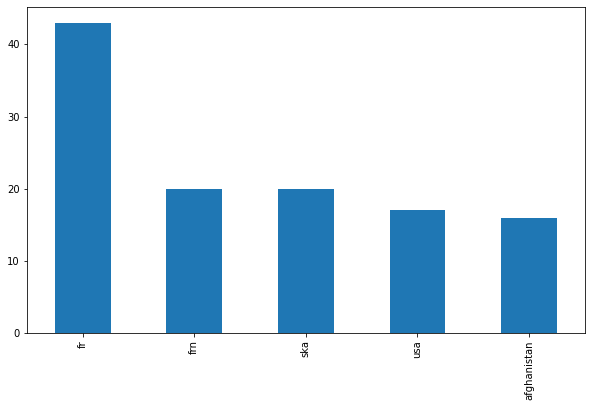

In [ ]:
#vilka ord är mest frekventa i vår sökning?
top_words = plot_top_words(clean_tweets, 20, 5)
top_words

In [ ]:
#gör om stora bokstäver till små
tweets_lowered = clean_tweets.str.lower()

fr             43
frn            20
ska            20
usa            17
afghanistan    16
kommer         16
sger           15
ver            14
nr             12
personer       10
vill           10
svt             9
polisen         9
talibanerna     8
regeringen      8
sverige         7
mnga            7
flera           7
sitt            6
000             6
dtype: int64

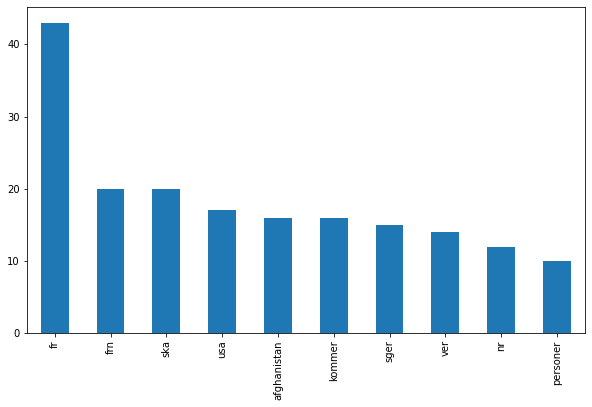

In [ ]:
top_words_lowered = plot_top_words(tweets_lowered, 20, 10)
top_words_lowered

In [ ]:
pd.DataFrame(
    {
        "Top tweeted clean": top_words[0:20].index,
        "Top tweeted lowered": top_words_lowered[0:20].index,
    }
)

,Top tweeted clean,Top tweeted lowered
0,fr,fr
1,frn,frn
2,ska,ska
3,usa,usa
4,afghanistan,afghanistan
5,kommer,kommer
6,sger,sger
7,ver,ver
8,nr,nr
9,personer,personer


In [ ]:
#ta bort ord som är 3 bokstäver eller kortare
tweets_low_no_small = tweets_lowered.str.replace(r"\b\w{1,3}\b", "")
tweets_low_no_small

0      polisen  inlett  frunderskning  vrdslshet  tra...
1      polisen tillkallade nationella bombgruppen   p...
2        utvisade kvinnornas  uppges antingen vara  e...
3       flesta    levt       flera  deras barn  ftts ...
4      analys: " klimatmyndighet, kanske   egen stats...
                             ...                        
195    kina  ryssland ppnar  vnskapliga relationer,  ...
196    sharialagar  glla  afghanistan  kvinnor   arbe...
197    utrikesminister  linde () kommer  hlla  presst...
198    "  sett    hnda  andra platser   inte lyckas  ...
199    talibanerna utropar allmn amnesti  uppmanar kv...
Name: Tweets, Length: 200, dtype: object

afghanistan       16
kommer            16
sger              15
personer          10
vill              10
polisen            9
talibanerna        8
regeringen         8
sverige            7
mnga               7
flera              7
enligt             6
andersson          6
tidigare           6
bara               6
sitt               6
kabul              6
mannen             5
finns              5
svensk             5
person             5
kvinnor            5
kunna              5
partiledare        4
ocks               4
miljarder          4
finansminister     4
fler               4
mnniskor           4
hela               4
avgr               4
just               4
kina               4
klart              4
kritik             4
lfven              4
landet             4
magdalena          3
mste               3
innan              3
elever             3
orkanen            3
kring              3
eslv               3
explosion          3
kronor             3
mord               3
flesta       

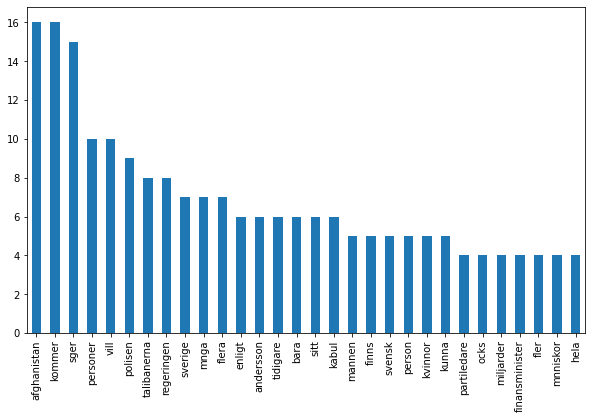

In [ ]:
# Skapar ny topplista utan korta ord
top_words_low_no_small = plot_top_words(tweets_low_no_small, 50, 30)
top_words_low_no_small